In [1]:
import numpy as np
import math
import copy

def calculate_C_H(n_ht, C_ht, C_hp, n_hf, C_hf):
  return (n_ht * C_ht) + C_hp + (n_hf * C_hf)


def calculate_rho(C_ht, n_ht, C_D):
  return 1 - math.exp((-C_ht * n_ht) / C_D)


def calculate_gamma(C_hf, n_hf, C_D):
  return 1 - math.exp((-C_hf * n_hf) / C_D)

def calculate_tau(C_hp, C_D):
  return 1 - math.exp((-C_hp) / C_D)

def calculate_zeta(C_nh, C_D):
  return 1 - math.exp((-C_nh) / C_D)

class Parameters:
    def __init__(self, B=None, C_ht=None, n_ht=None, C_hp=None, C_hf=None, n_hf=None,
                 C_nh=None, C_D=None, C_x=None,
                  V_i=None, V_i_prime=None, V_p=None, R_i=None, b_i=None,
                 d_i=None, c_i=None, e_i=None, x_i=None, p_0=None, p_1=None, p_2=None,
                 p_3=None, T=None, F=None, k=None, h_i=None):
        self.B = B
        self.C_ht = C_ht
        self.n_ht = n_ht
        self.C_hp = C_hp
        self.C_hf = C_hf
        self.n_hf = n_hf
        self.C_nh = C_nh
        self.C_H = calculate_C_H(n_ht=n_ht, C_ht=C_ht, C_hp=C_hp, n_hf=n_hf, C_hf=C_hf)
        self.C_D = C_D
        self.C_x = C_x
        self.rho = calculate_rho(C_ht, n_ht, C_D)
        self.tau = calculate_tau(C_hp, C_D)
        self.gamma = calculate_gamma(C_hf, n_hf, C_D)
        self.zeta = calculate_zeta(C_nh, C_D)
        self.V_i = V_i
        self.V_i_prime = V_i_prime
        self.V_p = V_p
        self.R_i = R_i
        self.b_i = b_i
        self.d_i = d_i
        self.c_i = c_i
        self.e_i = e_i
        self.x_i = x_i
        self.p_0 = p_0
        self.p_1 = p_1
        self.p_2 = p_2
        self.p_3 = p_3
        self.T = T
        self.F = F
        self.k = k
        self.h_i = h_i
    # def __copy__(self):
    #   my_dict = vars(self)
    #   print(my_dict)
    #   del my_dict['rho']
    #   del my_dict['tau']
    #   del my_dict['gamma']
    #   del my_dict['zeta']
    #   del my_dict['C_H']
    #   return Parameters(**my_dict)
    
    @staticmethod
    def from_dict(sampled_params):
        return Parameters(
            B=sampled_params['B'],
            C_ht=sampled_params['C_ht'],
            n_ht=sampled_params['n_ht'],
            C_hp=sampled_params['C_hp'],
            C_hf=sampled_params['C_hf'],
            n_hf=sampled_params['n_hf'],
            C_nh=sampled_params['C_nh'],
            C_D=sampled_params['C_D'],
            C_x=sampled_params['C_x'],
            V_i=sampled_params['V_i'],
            V_i_prime=sampled_params['V_i_prime'],
            V_p=sampled_params['V_p'],
            R_i=sampled_params['R_i'],
            b_i=sampled_params['b_i'],
            d_i=sampled_params['d_i'],
            c_i=sampled_params['c_i'],
            e_i=sampled_params['e_i'],
            x_i=sampled_params['x_i'],
            p_0=sampled_params['p_0'],
            p_1=sampled_params['p_1'],
            p_2=sampled_params['p_2'],
            p_3=sampled_params['p_3'],
            T=sampled_params['T'],
            F=sampled_params['F'],
            k=sampled_params['k'],
            h_i=sampled_params['h_i']
        )

# U_leaf0
def U_leaf0(p: Parameters):



    if p.k == 0:
        defender_utility = 0
    else:
        defender_utility = - p.C_H



    attacker_utility = p.T - p.C_D - p.F



    return defender_utility, attacker_utility



# U_leaf1
def U_leaf1(p: Parameters):



    if p.k == 0:
        defender_utility = 0
    else:
        defender_utility = -p.C_H



    attacker_utility = p.T - p.C_D



    return defender_utility, attacker_utility



# U_leaf2
def U_leaf2(p: Parameters):



    if p.k == 0:
        defender_utility = 0
    else:
        defender_utility = -p.C_H



    attacker_utility = p.T - p.C_D - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf3
def U_leaf3(p: Parameters):
    if p.k == 0:
        defender_utility = 0
    else:
        defender_utility = - p.C_H



    attacker_utility = p.T - p.C_D + p.C_x



    return defender_utility, attacker_utility



# U_leaf4
def U_leaf4(p: Parameters):



    if p.k == 0:
        defender_utility = - p.V_p
    else:
        defender_utility = - p.V_p - p.C_H



    attacker_utility = p.T - p.C_D +p.V_i_prime - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf5
def U_leaf5(p: Parameters):



    if p.k == 0:
        defender_utility = -p.V_p
    else:
        defender_utility = -p.V_p - p.C_H



    attacker_utility = p.T - p.C_D + p.V_i_prime - p.C_x



    return defender_utility, attacker_utility



# U_leaf6
def U_leaf6(p: Parameters):



    if p.k == 0:
        defender_utility = p.V_i
    else:
        defender_utility = p.V_i - p.C_H



    attacker_utility = -p.C_D - p.F



    return defender_utility, attacker_utility



# U_leaf7
def U_leaf7(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i
    else:
        defender_utility = p.V_i - p.C_H



    attacker_utility = -p.C_D



    return defender_utility, attacker_utility



# U_leaf8
def U_leaf8(p: Parameters):



    if p.k == 0:
        defender_utility = p.V_i
    else:
        defender_utility = p.V_i - p.C_H



    attacker_utility = -p.C_D - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf9
def U_leaf9(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i
    else:
        defender_utility = p.V_i - p.C_H



    attacker_utility = - p.C_D - p.C_x



    return defender_utility, attacker_utility



# U_leaf10
def U_leaf10(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.V_p
    else:
        defender_utility = p.V_i - p.V_p - p.C_H



    attacker_utility = - p.C_D + p.V_i_prime - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf11
def U_leaf11(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.V_p
    else:
        defender_utility = p.V_i - p.V_p - p.C_H



    attacker_utility = -p.C_D + p.V_i_prime - p.C_x



    return defender_utility, attacker_utility



# U_leaf12
def U_leaf12(p: Parameters):
    if p.k == 0:
        defender_utility = - p.R_i
    else:
        defender_utility = - p.R_i - p.C_H



    attacker_utility = p.R_i - p.C_D - p.F



    return defender_utility, attacker_utility



# U_leaf13
def U_leaf13(p: Parameters):



    if p.k == 0:
        defender_utility = - p.R_i
    else:
        defender_utility =  - p.R_i - p.C_H



    attacker_utility = p.R_i - p.C_D



    return defender_utility, attacker_utility



# U_leaf14
def U_leaf14(p: Parameters):
    if p.k == 0:
        defender_utility = - p.R_i
    else:
        defender_utility = - p.R_i - p.C_H



    attacker_utility = p.R_i - p.C_D - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf15
def U_leaf15(p: Parameters):
    if p.k == 0:
        defender_utility = - p.R_i
    else:
        defender_utility = - p.R_i - p.C_H



    attacker_utility = p.R_i - p.C_D - p.C_x



    return defender_utility, attacker_utility



# U_leaf16
def U_leaf16(p: Parameters):
    if p.k == 0:
        defender_utility = - p.R_i - p.V_p
    else:
        defender_utility = - p.R_i - p.V_p - p.C_H



    attacker_utility = p.R_i - p.C_D + p.V_i_prime - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf17
def U_leaf17(p: Parameters):
    if p.k == 0:
        defender_utility = - p.R_i - p.V_p
    else:
        defender_utility = - p.R_i - p.V_p - p.C_H



    attacker_utility = p.R_i - p.C_D + p.V_i_prime - p.C_x



    return defender_utility, attacker_utility



# U_leaf18
def U_leaf18(p: Parameters):
    if p.k == 0:
        defender_utility = - p.R_i + p.V_i
    else:
        defender_utility = p.V_i - p.R_i - p.C_H



    attacker_utility = p.R_i + p.T - p.C_D - p.F



    return defender_utility, attacker_utility



# U_leaf19
def U_leaf19(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.R_i
    else:
        defender_utility = p.V_i - p.R_i - p.C_H



    attacker_utility = p.R_i + p.T - p.C_D



    return defender_utility, attacker_utility





# U_leaf20
def U_leaf20(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.R_i
    else:
        defender_utility = p.V_i - p.R_i - p.C_H



    attacker_utility = p.R_i + p.T - p.C_D - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf21
def U_leaf21(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.R_i
    else:
        defender_utility = p.V_i - p.R_i - p.C_H

    attacker_utility = p.T + p.R_i - p.C_D - p.C_x



    return defender_utility, attacker_utility



# U_leaf22
def U_leaf22(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.R_i - p.V_p
    else:
        defender_utility = p.V_i - p.R_i - p.V_p - p.C_H



    attacker_utility = p.R_i + p.T - p.C_D + p.V_i_prime - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf23
def U_leaf23(p: Parameters):



    if p.k == 0:
        defender_utility = p.V_i - p.R_i - p.V_p
    else:
        defender_utility = p.V_i - p.R_i - p.V_p - p.C_H



    attacker_utility = p.R_i + p.T - p.C_D + p.V_i_prime - p.C_x



    return defender_utility, attacker_utility

In [2]:
def t_u_10_k_11(p: Parameters):
  return p.p_3 * U_leaf22(p)[1] + (1-p.p_3) * U_leaf23(p)[1]

def t_u_10_k_10(p: Parameters):
  return p.p_3 * U_leaf20(p)[1] + (1-p.p_3) * U_leaf21(p)[1]

def t_u_10_k_9(p: Parameters):
  return p.p_2 * U_leaf18(p)[1] + (1-p.p_2) * U_leaf19(p)[1]

def t_u_10_k_8(p: Parameters):
  return p.p_1 * U_leaf16(p)[1] + (1-p.p_1) * U_leaf17(p)[1]

def t_u_10_k_7(p: Parameters):
  return p.p_1 * U_leaf14(p)[1] + (1-p.p_1) * U_leaf15(p)[1]

def t_u_10_k_6(p: Parameters):
  return p.p_0 * U_leaf12(p)[1] + (1-p.p_0) * U_leaf13(p)[1]


def t_u_10_k_5(p: Parameters):
  return p.p_3 * U_leaf10(p)[1] + (1-p.p_3) * U_leaf11(p)[1]

def t_u_10_k_4(p: Parameters):
  return p.p_3 * U_leaf8(p)[1] + (1-p.p_3) * U_leaf9(p)[1]

def t_u_10_k_3(p: Parameters):
  return p.p_2 * U_leaf6(p)[1] + (1-p.p_2) * U_leaf7(p)[1]

def t_u_10_k_2(p: Parameters):
  return p.p_1 * U_leaf4(p)[1] + (1-p.p_1) * U_leaf5(p)[1]

def t_u_10_k_1(p: Parameters):
  return p.p_1 * U_leaf2(p)[1] + (1-p.p_1) * U_leaf3(p)[1]

def t_u_10_k_0(p: Parameters):
  return p.p_0 * U_leaf0(p)[1] + (1-p.p_0) * U_leaf1(p)[1]

In [3]:
def t_u_9_k_7(p: Parameters):
  return p.zeta * t_u_10_k_10(p) + (1- p.zeta) * t_u_10_k_11(p)

def t_u_9_k_6(p: Parameters):
  return 1 * t_u_10_k_9(p)

def t_u_9_k_5(p: Parameters):
  return p.zeta * t_u_10_k_7(p) + (1 - p.zeta) * t_u_10_k_8(p)

def t_u_9_k_4(p: Parameters):
  return 1 * t_u_10_k_6(p)
def t_u_9_k_3(p: Parameters):
  return p.zeta * t_u_10_k_4(p) + (1 - p.zeta) * t_u_10_k_5(p)

def t_u_9_k_2(p: Parameters):
  return 1 * t_u_10_k_3(p)
def t_u_9_k_1(p: Parameters):
  return p.zeta * t_u_10_k_1(p) + (1- p.zeta) * t_u_10_k_2(p)
def t_u_9_k_0(p: Parameters):
  return 1 * t_u_10_k_0(p)

In [4]:
#IV-A

def zeta_8_k_2(param:Parameters):
    t1 = param.p_0 *U_leaf12(param)[1] +(1-param.p_0)*U_leaf13(param)[1]
    t2 = param.p_1 *U_leaf16(param)[1] +(1-param.p_1)*U_leaf17(param)[1]
    t3 = param.p_1 *U_leaf14(param)[1] +(1-param.p_1)*U_leaf15(param)[1]
    t4 = param.p_1 *U_leaf16(param)[1] +(1-param.p_1)*U_leaf17(param)[1]

    return (t1-t2)/(t3-t4)


def x_8_k_2(param:Parameters):
    return param.zeta >= zeta_8_k_2(param)

def zeta_8_k_3(param:Parameters):
    t1 = param.p_2 *U_leaf18(param)[1] +(1-param.p_2)*U_leaf19(param)[1]
    t2 = param.p_3 *U_leaf22(param)[1] +(1-param.p_3)*U_leaf23(param)[1]
    t3 = param.p_3 *U_leaf20(param)[1] +(1-param.p_3)*U_leaf21(param)[1]
    t4 = param.p_3 *U_leaf22(param)[1] +(1-param.p_3)*U_leaf23(param)[1]

    return (t1-t2)/(t3-t4)

def x_8_k_3(param:Parameters):
    return param.zeta >= zeta_8_k_3(param)


def zeta_8_k_1(param:Parameters):
    t1 = param.p_2 *U_leaf6(param)[1] +(1-param.p_2)*U_leaf7(param)[1]
    t2 = param.p_3 *U_leaf10(param)[1] +(1-param.p_3)*U_leaf11(param)[1]
    t3 = param.p_3 *U_leaf8(param)[1] +(1-param.p_3)*U_leaf9(param)[1]
    t4 = param.p_3 *U_leaf10(param)[1] +(1-param.p_3)*U_leaf11(param)[1]

    return (t1-t2)/(t3-t4)



def x_8_k_1(param:Parameters):
    return param.zeta >= zeta_8_k_1(param)


def zeta_8_k_0(param:Parameters):
    t1 = param.p_0 *U_leaf0(param)[1] +(1-param.p_0)*U_leaf1(param)[1]
    t2 = param.p_1 *U_leaf4(param)[1] +(1-param.p_1)*U_leaf5(param)[1]
    t3 = param.p_1 *U_leaf2(param)[1] +(1-param.p_1)*U_leaf3(param)[1]
    t4 = param.p_1 *U_leaf4(param)[1] +(1-param.p_1)*U_leaf5(param)[1]

    return (t1-t2)/(t3-t4)

def x_8_k_0(param:Parameters):
    return param.zeta >= zeta_8_k_0(param)

In [5]:
def t_u_8_k_3(p:Parameters):
  return x_8_k_3(p) * t_u_9_k_6(p) + (1-x_8_k_3(p)) * t_u_9_k_7(p)
def t_u_8_k_2(p:Parameters):
  return x_8_k_2(p) * t_u_9_k_4(p) + (1- x_8_k_2(p)) * t_u_9_k_5(p)
def t_u_8_k_1(p:Parameters):
  return x_8_k_1(p) * t_u_9_k_2(p) + (1 - x_8_k_1(p)) * t_u_9_k_3(p)
def t_u_8_k_0(p:Parameters):
  return x_8_k_0(p) * t_u_9_k_0(p) + (1 - x_8_k_0(p)) * t_u_9_k_1(p)


In [6]:
#preyea

#IV-B 1

def lambda_7_k_1(param:Parameters):
   return  t_u_8_k_3(p)-t_u_8_k_2(p)

def e_7_k_1(param:Parameters):
    return lambda_7_k_1(param)>=0

#IV-B 2

def lambda_7_k_0(param:Parameters):
    return t_u_8_k_1(p) - t_u_8_k_0(p)


def e_7_k_0(param:Parameters):
    return lambda_7_k_0(param)>=0

In [7]:
def t_u_7_k_1(p:Parameters):
  return e_7_k_1(p) * t_u_8_k_2(p) + (1 - e_7_k_1(p)) * t_u_8_k_3(p)
def t_u_7_k_0(p:Parameters):
  return e_7_k_0(p) * t_u_8_k_0(p) + (1 - e_7_k_0(p)) * t_u_8_k_1(p)

In [8]:
def u_10_k_11(p: Parameters):
  return p.p_3 * U_leaf22(p)[0] + (1-p.p_3) * U_leaf23(p)[0]

def u_10_k_10(p: Parameters):
  return p.p_3 * U_leaf20(p)[0] + (1-p.p_3) * U_leaf21(p)[0]

def u_10_k_9(p: Parameters):
  return p.p_2 * U_leaf18(p)[0] + (1-p.p_2) * U_leaf19(p)[0]

def u_10_k_8(p: Parameters):
  return p.p_1 * U_leaf16(p)[0] + (1-p.p_1) * U_leaf17(p)[0]

def u_10_k_7(p: Parameters):
  return p.p_1 * U_leaf14(p)[0] + (1-p.p_1) * U_leaf15(p)[0]

def u_10_k_6(p: Parameters):
  return p.p_0 * U_leaf12(p)[0] + (1-p.p_0) * U_leaf13(p)[0]


def u_10_k_5(p: Parameters):
  return p.p_3 * U_leaf10(p)[0] + (1-p.p_3) * U_leaf11(p)[0]

def u_10_k_4(p: Parameters):
  return p.p_3 * U_leaf8(p)[0] + (1-p.p_3) * U_leaf9(p)[0]

def u_10_k_3(p: Parameters):
  return p.p_2 * U_leaf6(p)[0] + (1-p.p_2) * U_leaf7(p)[0]

def u_10_k_2(p: Parameters):
  return p.p_1 * U_leaf4(p)[0] + (1-p.p_1) * U_leaf5(p)[0]

def u_10_k_1(p: Parameters):
  return p.p_1 * U_leaf2(p)[0] + (1-p.p_1) * U_leaf3(p)[0]

def u_10_k_0(p: Parameters):
  return p.p_0 * U_leaf0(p)[0] + (1-p.p_0) * U_leaf1(p)[0]

In [9]:
def u_9_k_7(p: Parameters):
  return p.zeta * u_10_k_10(p) + (1- p.zeta) * u_10_k_11(p)

def u_9_k_6(p: Parameters):
  return 1 * u_10_k_9(p)

def u_9_k_5(p: Parameters):
  return p.zeta * u_10_k_7(p) + (1 - p.zeta) * u_10_k_8(p)

def u_9_k_4(p: Parameters):
  return 1 * u_10_k_6(p)
def u_9_k_3(p: Parameters):
  return p.zeta * u_10_k_4(p) + (1 - p.zeta) * u_10_k_5(p)

def u_9_k_2(p: Parameters):
  return 1 * u_10_k_3(p)
def u_9_k_1(p: Parameters):
  return p.zeta * u_10_k_1(p) + (1- p.zeta) * u_10_k_2(p)
def u_9_k_0(p: Parameters):
  return 1 * u_10_k_0(p)

In [10]:
def u_8_k_3(p:Parameters):
  return x_8_k_3(p) * u_9_k_6(p) + (1-x_8_k_3(p)) * u_9_k_7(p)
def u_8_k_2(p:Parameters):
  return x_8_k_2(p) * u_9_k_4(p) + (1- x_8_k_2(p)) * u_9_k_5(p)
def u_8_k_1(p:Parameters):
  return x_8_k_1(p) * u_9_k_2(p) + (1 - x_8_k_1(p)) * u_9_k_3(p)
def u_8_k_0(p:Parameters):
  return x_8_k_0(p) * u_9_k_0(p) + (1 - x_8_k_0(p)) * u_9_k_1(p)


In [11]:
def u_7_k_1(p:Parameters):
  return e_7_k_1(p) * u_8_k_2(p) + (1 - e_7_k_1(p)) * u_8_k_3(p)
def u_7_k_0(p:Parameters):
  return e_7_k_0(p) * u_8_k_0(p) + (1 - e_7_k_0(p)) * u_8_k_1(p)

In [12]:
#IV-C 1
def beta_e_x(param:Parameters):
   return e_7_k_1(param)*(x_8_k_3(param)*
                          u_9_k_7(param)+(1-x_8_k_3(param))*u_9_k_6(param)) \
                          + (1-e_7_k_1(param))*(x_8_k_2(param)*u_9_k_5(param) \
                          +(1-x_8_k_2(param))*u_9_k_4(param))- e_7_k_0(param)* \
                           (x_8_k_1(param)*u_9_k_3(param)+(1-x_8_k_1(param))*u_9_k_2(param)) \
                           -(1-e_7_k_0(param))*(x_8_k_0(param)*u_9_k_1(param)+(1-x_8_k_0(param))*u_9_k_0(param))


def c_6_k(param:Parameters):
    return beta_e_x(param)>0

In [13]:
def t_u_7_k_0_with_k(p: Parameters, k):
  cloned_p = copy.copy(p)
  cloned_p.k = k
  return t_u_7_k_0(cloned_p)


def t_u_7_k_1_with_k(p: Parameters, k):
  cloned_p = copy.copy(p)
  cloned_p.k = k
  return t_u_7_k_1(cloned_p)


In [14]:
def c_6(p: Parameters, k):
  cloned_p = copy.copy(p)
  cloned_p.k = k
  return c_6_k(p)

In [15]:
#IV-D 3



# def alpha(param:Parameters):
#    return param.rho*param.tau*[param.gamma*{c_6(param,1)*t_u_7_k_0_with_k(param,1)+(1-c_6(param,1)*t_u_7_k_1_with_k(param,1))}
#                                +(1-param.gamma)*{c_6(param,2)*t_u_7_k_0_with_k(param,2)+(1-c_6(param,2))*t_u_7_k_1_with_k(param,2)}]
#    +param.rho(1-param.tau)*[param.gamma*{c_6(param,3)*t_u_7_k_0_with_k(param,3)+(1-c_6(param,3))*t_u_7_k_1_with_k(param,3)} +(1-param.gamma)*{c_6(param,4)*t_u_7_k_0_with_k(param,4)+(1-c_6_4)*t_u_7_k_1_with_k(param,4)}]
#    +(1-param.rho)*param.tau*[param.gamma*{c_6(param,5)*t_u_7_k_0_with_k(param,5)+(1-c_6(param,5))*t_u_7_k_1_with_k(param,5)}
#                              +(1-param.gamma)*{c_6(param,6)*t_u_7_k_0_with_k(param,6)+(1-c_6(param,6))*t_u_7_k_1_with_k(param,6)}]
#    +(1-param.rho)*(1-param.tau)[param.gamma*{c_6(param,7)*t_u_7_k_0_with_k(param,7)+(1-c_6(param,7))*t_u_7_k_1_with_k(param,7)}
#                                 +(1-param.gamma)*{c_6(param,8)*t_u_7_k_0_with_k(param,8)+(1-c_6(param,8))*t_u_7_k_1_with_k(param,8)}]

def alpha(param: Parameters):
    return param.rho * param.tau * (
        param.gamma * (c_6(param, 1) * t_u_7_k_0_with_k(param, 1) + (1 - c_6(param, 1) * t_u_7_k_1_with_k(param, 1))) +
        (1 - param.gamma) * (c_6(param, 2) * t_u_7_k_0_with_k(param, 2) + (1 - c_6(param, 2)) * t_u_7_k_1_with_k(param, 2))
    ) + param.rho * (1 - param.tau) * (
        param.gamma * (c_6(param, 3) * t_u_7_k_0_with_k(param, 3) + (1 - c_6(param, 3)) * t_u_7_k_1_with_k(param, 3)) +
        (1 - param.gamma) * (c_6(param, 4) * t_u_7_k_0_with_k(param, 4) + (1 - c_6(param, 4)) * t_u_7_k_1_with_k(param, 4))
    ) + (1 - param.rho) * param.tau * (
        param.gamma * (c_6(param, 5) * t_u_7_k_0_with_k(param, 5) + (1 - c_6(param, 5)) * t_u_7_k_1_with_k(param, 5)) +
        (1 - param.gamma) * (c_6(param, 6) * t_u_7_k_0_with_k(param, 6) + (1 - c_6(param, 6)) * t_u_7_k_1_with_k(param, 6))
    ) + (1 - param.rho) * (1 - param.tau) * (
        param.gamma * (c_6(param, 7) * t_u_7_k_0_with_k(param, 7) + (1 - c_6(param, 7)) * t_u_7_k_1_with_k(param, 7)) +
        (1 - param.gamma) * (c_6(param, 8) * t_u_7_k_0_with_k(param, 8) + (1 - c_6(param, 8)) * t_u_7_k_1_with_k(param, 8))
    )



def d_2_1(param:Parameters):
   return 1 if alpha(param)>0 else 0

In [16]:
def t_u_6_k(p: Parameters, k):
  cloned_p = copy.copy(p)
  cloned_p.k = k
  return c_6(cloned_p,k) * t_u_7_k_0_with_k(cloned_p, k) + (1-c_6(cloned_p,k)) * t_u_7_k_1_with_k(cloned_p, k)


In [17]:
def u_6_k(p: Parameters, k):
  cloned_p = copy.copy(p)
  cloned_p.k = k
  return c_6(p, k) * u_7_k_0(cloned_p) + (1-c_6(cloned_p, k)) * u_7_k_1(cloned_p)


In [18]:
#IV-D 4

def t_u_6_0(p:Parameters):
    return t_u_6_k(p, 0)

def d_2_0(param:Parameters):
    return 1 if t_u_6_0(param) > 0 else 0


In [19]:
# IV-D 2
def d_2_2(p:Parameters):
    return 0


In [20]:
# IV-D 1
def d_2_3(p:Parameters):
    return 0


In [21]:
def t_u_3_1(p: Parameters):
  return p.rho * (p.tau * (p.gamma * t_u_6_k(p, 1) + (1-p.gamma) * t_u_6_k(p,2) \
                           + (1-p.tau) * (p.gamma * t_u_6_k(p, 3) + (1-p.gamma) * t_u_6_k(p,4))))  \
                           +  (1 - p.rho) * (p.tau * (p.gamma * t_u_6_k(p, 5) + (1-p.gamma) * t_u_6_k(p,6) \
                           + (1-p.tau) * (p.gamma * t_u_6_k(p, 7) + (1-p.gamma) * t_u_6_k(p,8))))


In [22]:
def u_3_1(p: Parameters):
  return p.rho * (p.tau * (p.gamma * u_6_k(p, 1) + (1-p.gamma) * u_6_k(p,2) \
                           + (1-p.tau) * (p.gamma * u_6_k(p, 3) + (1-p.gamma) * u_6_k(p,4))))  \
                           +  (1 - p.rho) * (p.tau * (p.gamma * u_6_k(p, 5) + (1-p.gamma) * u_6_k(p,6) \
                           + (1-p.tau) * (p.gamma * u_6_k(p, 7) + (1-p.gamma) * u_6_k(p,8))))


In [23]:
def u_2_0(p: Parameters):
    return ((1 - d_2_0(p)) * p.V_i) + (d_2_0(p) * u_6_k(p, 0))

In [24]:
def u_2_1(p: Parameters):
    return  ((1 - d_2_1(p)) * (p.V_i -p.C_H)) + (d_2_1(p) * u_3_1(p))

In [25]:
def u_2_2(p: Parameters):
    return ((1 - d_2_2(p)) * (p.V_i -p.B)) + (d_2_2(p) * (p.V_i -p.B))

In [26]:
def u_2_3(p: Parameters):
    return ((1 - d_2_3(p)) * (p.V_i -p.B - p.C_H)) + (d_2_3(p) * (p.V_i -p.B- p.C_H))

In [27]:
p = Parameters(B=100, C_ht=10, n_ht=5, C_hp=10, C_hf=10, n_hf=5,
                        C_nh=10,  C_D=50, C_x=5,
                        V_i=50, V_i_prime=60, V_p=70, R_i=80, b_i=5,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=5, k=0)

In [28]:
u_3_1(p)

-81.53352944210543

In [29]:
vars(p)

{'B': 100,
 'C_ht': 10,
 'n_ht': 5,
 'C_hp': 10,
 'C_hf': 10,
 'n_hf': 5,
 'C_nh': 10,
 'C_H': 110,
 'C_D': 50,
 'C_x': 5,
 'rho': 0.6321205588285577,
 'tau': 0.18126924692201818,
 'gamma': 0.6321205588285577,
 'zeta': 0.18126924692201818,
 'V_i': 50,
 'V_i_prime': 60,
 'V_p': 70,
 'R_i': 80,
 'b_i': 5,
 'd_i': 5,
 'c_i': 5,
 'e_i': 5,
 'x_i': 5,
 'p_0': 0.1,
 'p_1': 0.2,
 'p_2': 0.3,
 'p_3': 0.4,
 'T': 10,
 'F': 5,
 'k': 0,
 'h_i': None}

In [30]:
!pip3 install seaborn

[-17.293294335267746, 0.0, 17.293294335267746, 34.58658867053549, 51.87988300580323, 69.17317734107098, 86.46647167633873, 103.75976601160647, 121.05306034687422, 138.34635468214196]
[-43.233235838169364, -25.93994150290162, -8.646647167633873, 8.646647167633873, 25.939941502901615, 43.233235838169364, 60.52653017343711, 77.81982450870485, 95.11311884397259, 112.40641317924035]
[-69.17317734107098, -51.87988300580324, -34.58658867053549, -17.293294335267746, -6.143812333642894e-15, 17.293294335267746, 34.58658867053549, 51.87988300580324, 69.17317734107097, 86.46647167633873]
[-95.1131188439726, -77.81982450870485, -60.52653017343711, -43.233235838169364, -25.939941502901622, -8.646647167633873, 8.646647167633873, 25.93994150290162, 43.23323583816936, 60.52653017343711]
[-121.05306034687422, -103.75976601160647, -86.46647167633873, -69.17317734107098, -51.879883005803244, -34.58658867053549, -17.293294335267746, 0.0, 17.293294335267735, 34.58658867053549]


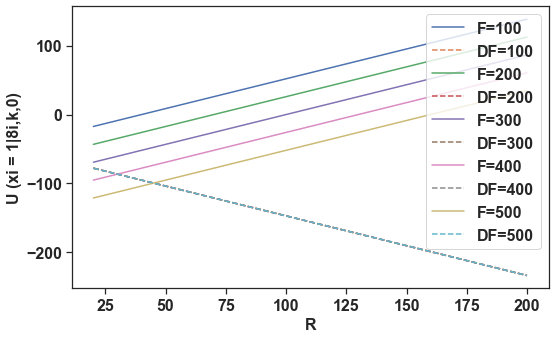

In [31]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rcParams['text.usetex'] = True

sns.set(rc={'figure.figsize':(8,5)})
sns.set(style = 'white')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
# plt.rcParams['xtick.labelweight'] = 'bold'
# plt.rcParams['ytick.labelweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 16
plt.rcParams["figure.autolayout"] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True


Ri = defaultdict(list)
Ei = defaultdict(list)
Edi = defaultdict(list)
for F in range(100, 501, 100):
  for R in range(20, 201, 20):
    p = Parameters(B=100, C_ht=1, n_ht=50, C_hp=20, C_hf=5, n_hf=10,
                        C_nh=50,  C_D=20, C_x=5,
                        V_i=50, V_i_prime=60, V_p=40, R_i=R, b_i=5,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=F, k=0)

    e_a_b_1 = t_u_3_1(p)
    e_d_b_1 = u_3_1(p)


    Ri[F].append( R )
    Ei[F].append( e_a_b_1 )
    Edi[F].append(e_d_b_1)


for F in range(100, 501, 100):
  print(Ei[F])



# Generate multiple lines on the same plot
  plt.plot(Ri[F], Ei[F], label=f'F={F}')
  plt.plot(Ri[F], Edi[F], '--', label=f'DF={F}')



# Adding title and labels
# plt.title("R vs U")
plt.xlabel("R")
plt.ylabel('U (xi = 1|8i,k,0)')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

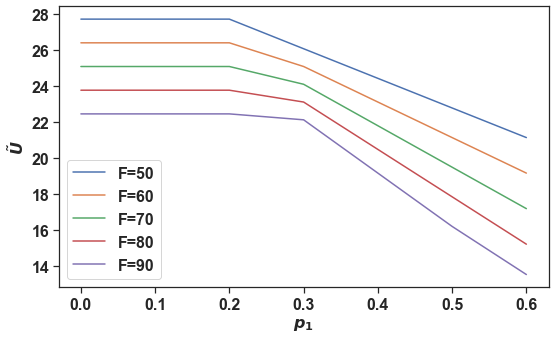

In [32]:
from collections import defaultdict
import matplotlib.pyplot as plt

Ri = defaultdict(list)
Ei = defaultdict(list)
for F in range(50, 100, 10):
  for R in np.arange(0, 0.7, 0.1):
    p = Parameters(B=100, C_ht=10, n_ht=5, C_hp=10, C_hf=10, n_hf=5,
                        C_nh=10,  C_D=50, C_x=5,
                        V_i=50, V_i_prime=60, V_p=70, R_i=100, b_i=5,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=R, p_2=0.3, p_3=0.4,
                        T=10, F=F, k=0)

    e_a_b_1 = t_u_3_1(p)

    Ri[F].append( R )
    Ei[F].append( e_a_b_1 )


for F in range(50, 100, 10):
# Generate multiple lines on the same plot
  plt.plot(Ri[F], Ei[F], label=f'F={F}')


# Adding title and labels
plt.xlabel(r"$p_1$")
plt.ylabel(r"$\tilde{U}$")

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

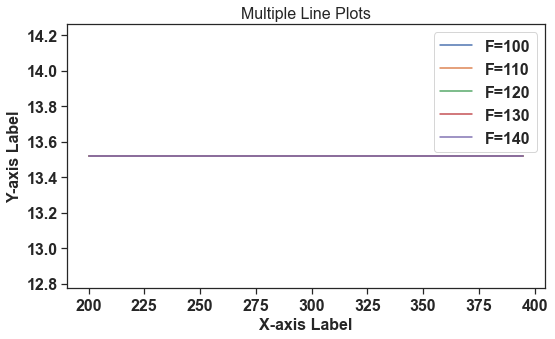

In [33]:
from collections import defaultdict
import matplotlib.pyplot as plt

Ri = defaultdict(list)
Ei = defaultdict(list)
for F in range(100, 150, 10):
  for R in np.arange(200, 400, 5):
    p = Parameters(B=100, C_ht=10, n_ht=5, C_hp=10, C_hf=10, n_hf=5,
                        C_nh=10,  C_D=50, C_x=5,
                        V_i=F, V_i_prime=60, V_p=70, R_i=R, b_i=5,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.3, p_2=0.3, p_3=0.4,
                        T=10, F=5, k=0)

    e_d_b_1 = u_3_1(p)

    Ri[F].append( R )
    Ei[F].append( e_a_b_1 )


for F in range(100, 150, 10):
#   print(Ei[F])



# Generate multiple lines on the same plot
  plt.plot(Ri[F], Ei[F], label=f'F={F}')


# Adding title and labels
plt.title("Multiple Line Plots")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

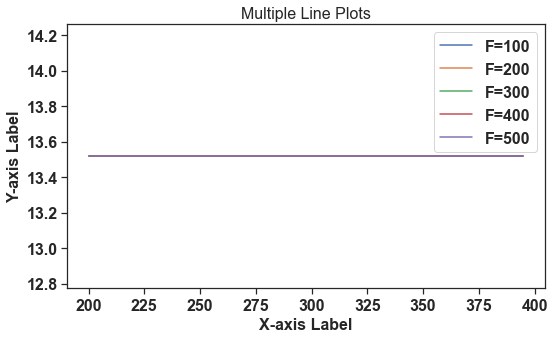

In [34]:
from collections import defaultdict
import matplotlib.pyplot as plt

Ri = defaultdict(list)
Ei = defaultdict(list)
for F in range(100, 501, 100):
  for R in np.arange(200, 400, 5):
    p = Parameters(B=100, C_ht=0.1, n_ht=F, C_hp=10, C_hf=0.05, n_hf=R,
                        C_nh=10,  C_D=50, C_x=5,
                        V_i=F, V_i_prime=60, V_p=70, R_i=R, b_i=5,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.3, p_2=0.3, p_3=0.4,
                        T=10, F=5, k=0)

    e_d_b_1 = u_3_1(p)

    Ri[F].append( R )
    Ei[F].append( e_a_b_1 )


for F in range(100, 501, 100):
#   print(Ei[F])



# Generate multiple lines on the same plot
  plt.plot(Ri[F], Ei[F], label=f'F={F}')


# Adding title and labels
plt.title("Multiple Line Plots")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

{'B': 100, 'C_ht': 1, 'n_ht': 20, 'C_hp': 20, 'C_hf': 5, 'n_hf': 10, 'C_nh': 50, 'C_H': 90, 'C_D': 20, 'C_x': 5, 'rho': 0.6321205588285577, 'tau': 0.6321205588285577, 'gamma': 0.9179150013761012, 'zeta': 0.9179150013761012, 'V_i': 50, 'V_i_prime': 60, 'V_p': 40, 'R_i': 30, 'b_i': 5, 'd_i': 5, 'c_i': 5, 'e_i': 5, 'x_i': 5, 'p_0': 0.1, 'p_1': 0.2, 'p_2': 0.3, 'p_3': 0.4, 'T': 10, 'F': 500, 'k': 0, 'h_i': None}


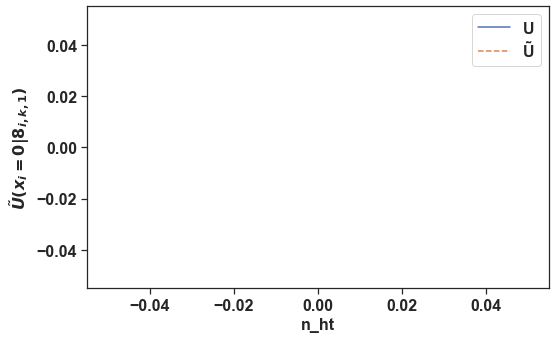

In [35]:
from collections import defaultdict
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True

Ri = defaultdict(list)
Ei = []
Edi = []
Ni = []
for n_ht in range(20, 50, 3):
    p = Parameters(B=100, C_ht=1, n_ht=n_ht, C_hp=20, C_hf=5, n_hf=10,
                        C_nh=50,  C_D=20, C_x=5,
                        V_i=50, V_i_prime=60, V_p=40, R_i=30, b_i=5,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=500, k=0)
    
    print(vars(p))
    break
    C_H = p.C_H
    e_d_b_1 = u_3_1(p)
    e_a_b_1 = t_u_3_1(p)
    Edi.append(e_d_b_1)
    Ei.append(e_a_b_1)
    Ni.append(n_ht)




# Generate multiple lines on the same plot
plt.plot(Ni, Edi, label=f'U')
plt.plot(Ni, Ei, '--', label=f'Ũ')



# Adding title and labels
# plt.title("R vs U")
plt.xlabel("n_ht")
plt.ylabel(r"$\tilde{U}(x_i = 0 | 8_{i,k,1})$")

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

[-17.293294335267746, 0.0, 17.293294335267746, 34.58658867053549, 51.87988300580323, 69.17317734107098, 86.46647167633873, 103.75976601160647, 121.05306034687422, 138.34635468214196]
[-43.233235838169364, -25.93994150290162, -8.646647167633873, 8.646647167633873, 25.939941502901615, 43.233235838169364, 60.52653017343711, 77.81982450870485, 95.11311884397259, 112.40641317924035]
[-69.17317734107098, -51.87988300580324, -34.58658867053549, -17.293294335267746, -6.143812333642894e-15, 17.293294335267746, 34.58658867053549, 51.87988300580324, 69.17317734107097, 86.46647167633873]
[-95.1131188439726, -77.81982450870485, -60.52653017343711, -43.233235838169364, -25.939941502901622, -8.646647167633873, 8.646647167633873, 25.93994150290162, 43.23323583816936, 60.52653017343711]
[-121.05306034687422, -103.75976601160647, -86.46647167633873, -69.17317734107098, -51.879883005803244, -34.58658867053549, -17.293294335267746, 0.0, 17.293294335267735, 34.58658867053549]


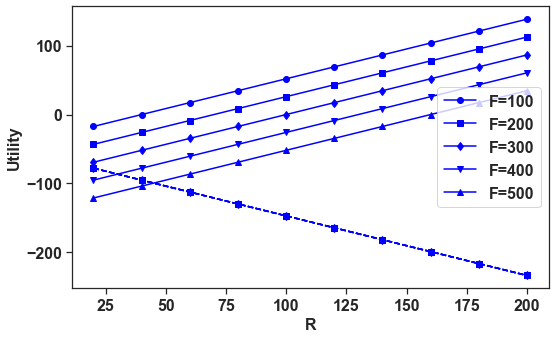

In [36]:
from collections import defaultdict
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True

Ri = defaultdict(list)
Ei = defaultdict(list)
Edi = defaultdict(list)
for F in range(100, 501, 100):
  for R in range(20, 201, 20):
    p = Parameters(B=100, C_ht=1, n_ht=50, C_hp=20, C_hf=5, n_hf=10,
                        C_nh=50,  C_D=20, C_x=5,
                        V_i=50, V_i_prime=60, V_p=40, R_i=R, b_i=5,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=F, k=0)

    e_a_b_1 = t_u_3_1(p)
    e_d_b_1 = u_3_1(p)


    Ri[F].append( R )
    Ei[F].append( e_a_b_1 )
    Edi[F].append(e_d_b_1)


markers = ['o', 's', 'd', 'v', '^']
i = 0
for F in range(100, 501, 100):
  print(Ei[F])



# Generate multiple lines on the same plot
  plt.plot(Ri[F], Ei[F], color='blue', label=f'F={F}', marker=markers[i])
  plt.plot(Ri[F], Edi[F], '--', color='blue',  marker=markers[i])
  i = i + 1



# Adding title and labels
# plt.title("R vs U")
plt.xlabel("R", fontsize=16)
plt.ylabel(r"Utility", fontsize=16)

# Adding a legend
plt.legend()

# Displaying the plot

plt.savefig("Utility.pdf", format="pdf", bbox_inches="tight")
plt.show()


0.3934693402873666
0.47795422323898396
0.5506710358827784
0.6132589765454988
0.6671289163019205
0.7134952031398099
0.7534030360583935
0.7877520261732569
0.8173164759472653
0.8427628336863724
0.8646647167633873
0.883515842226503
0.8997411562771962
0.9137064135006295
0.9257264217856661
0.9360721387932924
0.9449767799435927
0.952641075608859
0.9592377960216338
0.964915645899155
0.9698026165776815
0.9740088712212447
0.9776292281438344
0.9807452982246131
0.9834273245982388
0.9857357660910008
0.9877226600969315
0.9894327956161474
0.9909047228983042
0.9921716224507742


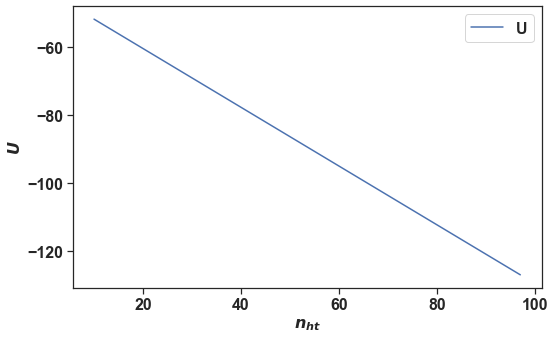

In [37]:
from collections import defaultdict
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True

Ri = defaultdict(list)
Ei = []
Edi = []
Ni = []
for n_ht in range(10, 100, 3):
    p = Parameters(B=100, C_ht=1, n_ht=n_ht, C_hp=20, C_hf=5, n_hf=10,
                        C_nh=50,  C_D=20, C_x=5,
                        V_i=50, V_i_prime=60, V_p=40, R_i=30, b_i=5,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=500, k=0)
    
    print(p.rho)
#     break
    C_H = p.C_H
    e_d_b_1 = u_3_1(p)
    e_a_b_1 = t_u_3_1(p)
    Edi.append(e_d_b_1)
    Ei.append(e_a_b_1)
    Ni.append(n_ht)




# Generate multiple lines on the same plot
plt.plot(Ni, Edi, label=f'U')
# plt.plot(Ni, Ei, '--', label=f'Ũ')



# Adding title and labels
# plt.title("R vs U")
plt.xlabel(r"$n_{ht}$")
plt.ylabel(r"$U$")

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

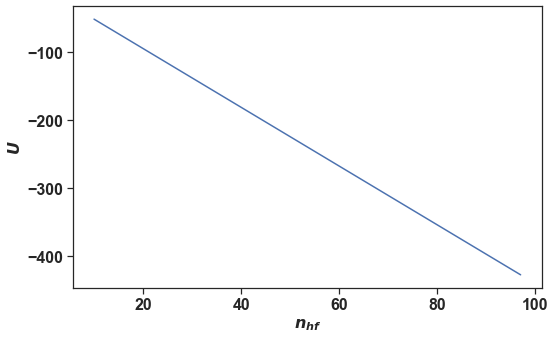

In [38]:
from collections import defaultdict
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True

Ri = defaultdict(list)
Ei = []
Edi = []
Ni = []
for n_ht in range(10, 100, 3):
    p = Parameters(B=100, C_ht=1, n_ht=10, C_hp=20, C_hf=5, n_hf=n_ht,
                        C_nh=50,  C_D=20, C_x=5,
                        V_i=50, V_i_prime=60, V_p=40, R_i=30, b_i=5,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=500, k=0)
    
#     break
    C_H = p.C_H
    e_d_b_1 = u_3_1(p)
    e_a_b_1 = t_u_3_1(p)
    Edi.append(e_d_b_1)
    Ei.append(e_a_b_1)
    Ni.append(n_ht)




# Generate multiple lines on the same plot
plt.plot(Ni, Edi)
# plt.plot(Ni, Ei, '--', label=f'Ũ')



# Adding title and labels
# plt.title("R vs U")
plt.xlabel(r"$n_{hf}$")
plt.ylabel(r"$U$")

# Adding a legend
# plt.legend()
plt.savefig("n_hf.pdf", format="pdf", bbox_inches="tight")

# Displaying the plot
plt.show()

In [39]:
%pip install cvxpy
%pip install gurobipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [40]:
import gurobipy as gp
from gurobipy import GRB

In [41]:
m = gp.Model()

Restricted license - for non-production use only - expires 2024-10-28


In [42]:
systems = []

In [43]:
systems.append(Parameters(B=100, C_ht=1, n_ht=10, C_hp=20, C_hf=5, n_hf=n_ht,
                        C_nh=50,  C_D=20, C_x=5,
                        V_i=50, V_i_prime=60, V_p=40, R_i=30, b_i=None,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=500, k=0, h_i=None))

In [44]:
systems.append(Parameters(B=100000, C_ht=10, n_ht=100, C_hp=20, C_hf=5, n_hf=n_ht,
                        C_nh=50,  C_D=20, C_x=5,
                        V_i=50, V_i_prime=60, V_p=40, R_i=440, b_i=None,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=500, k=0, h_i=None))

In [45]:
systems.append(Parameters(B=100000, C_ht=10, n_ht=100, C_hp=20, C_hf=5, n_hf=n_ht,
                        C_nh=50,  C_D=20, C_x=100,
                        V_i=50, V_i_prime=60, V_p=400, R_i=6000, b_i=None,
                        d_i=5, c_i=5, e_i=10, x_i=105, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=500, k=0, h_i=None))

In [46]:
for index, system in enumerate(systems):
    system.h_i = m.addVar(vtype=GRB.BINARY, name=f"h_{index}")
    system.b_i =  m.addVar(vtype=GRB.BINARY, name=f"b_{index}")

In [47]:
def get_expression_for_single_system(s):
    return ((1 - s.b_i) * (1 - s.h_i) * u_2_0(s)) \
            + ((1 - s.b_i) * (s.h_i) * u_2_1(s)) \
            + ((s.b_i) * (1 - s.h_i) * u_2_2(s)) \
            + ((s.b_i) * (s.h_i) * u_2_3(s))

In [48]:
optimization_expr = sum([get_expression_for_single_system(system) for system in systems])

In [49]:
m.setObjective(optimization_expr, GRB.MINIMIZE)


In [50]:
m.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 6 columns and 0 nonzeros
Model fingerprint: 0x3bc5fd28
Model has 2 quadratic objective terms
Variable types: 0 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+02, 1e+05]
  QObjective range [5e+02, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective -6290.000000
Presolve removed 0 rows and 6 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: -6290 
No other solutions better than -6290

Optimal solution found (tolerance 1.00e-04)
Best objective -6.290000000000e+03, best bound -6.290000000000e

In [51]:
all_vars = m.getVars()
values = m.getAttr("X", all_vars)
names = m.getAttr("VarName", all_vars)

for name, val in zip(names, values):
    print(f"{name} = {val}")

h_0 = 0.0
b_0 = 0.0
h_1 = 0.0
b_1 = 0.0
h_2 = 0.0
b_2 = 0.0


In [ ]:
import random


def simulate_multi_stage_game(param_instance, attribute_ranges, subgames):
    """
    Simulate the full game by supplying utilities for each stage with their corresponding attribute value draw from sample space as in attribute range param.

    Parameters:
    - param_instance: An instance of the Parameters class representing the game's initial conditions.
    - attribute_ranges: A dictionary specifying parameter ranges for sensitivity analysis at each stage.
    - subgames: A list of subgames for each stage, including stage name, subgame name, lambda function, and empty result list.

    Returns:
    - A list of subgames with results for each stage.

    Example Usage:
    ```
    # Define the attribute ranges as a dictionary for each stage
    attribute_ranges = {
        'Stage 1': { 'C_D': (10, 30), 'p_0': (0.05, 0.15) },
        'Stage 2': { 'C_x': (1, 10), 'p_1': (0.1, 0.3) }
        # Add more stages and their parameter ranges as needed
    }

    # Define a list of subgames for each stage
    subgames = [
        ('Stage 1', "Attacker Utilities", lambda x: subgame1(x), []),
        ('Stage 1', "Defender Utilities", lambda x: subgame2(x), [])
        # Add more subgames and their lambda functions for additional stages
    ]

    # Simulate the multi-stage game
    full_game_results = simulate_multi_stage_game(param_instance, attribute_ranges, subgames)
    ```
    """
    num_simulations = 100

    for _ in range(num_simulations):
        sampled_params = param_instance.__dict__.copy()
        for stage, subgame_name, subgame_lambda, subgame_result in subgames:
            for attr, (min_val, max_val) in attribute_ranges[stage].items():
                sampled_params[attr] = random.uniform(min_val, max_val)

            parameter_instance = Parameters.from_dict(sampled_params)
            result = subgame_lambda(parameter_instance)
            subgame_result.append(result)

    return subgames



def senstivity_analysis(param_instance, attribute_ranges, subgames):
    """
    Performs sensitivity analysis by varying parameter settings at each stage and collecting results.
    The function will return results for each stage, including outcome data for analysis.

    Parameters:
    - param_instance: An instance of the Parameters class representing the game's initial conditions.
    - attribute_ranges: A dictionary specifying parameter ranges for sensitivity analysis at each stage.
    - subgames: A list of subgames for each stage, including name, lambda function, and empty result list.

    Returns:
    - A list of subgames with results for each stage.

    Example Usage:
    ```
    # Define the attribute ranges as a dictionary for each stage
    attribute_ranges = {
        'Stage 1': { 'C_D': (10, 30), 'p_0': (0.05, 0.15) },
        'Stage 2': { 'C_x': (1, 10), 'p_1': (0.1, 0.3) }
        # Add more stages and their parameter ranges as needed
    }

    # Define a list of subgames for each stage
    subgames = [
        ('Stage 1', lambda x: subgame1(x), []),
        ('Stage 2', lambda x: subgame2(x), [])
        # Add more subgames and their lambda functions for additional stages
    ]

    # Simulate the multi-stage game
    full_game_results = senstivity_analysis(param_instance, attribute_ranges, subgames)
    ```
    """
    num_simulations = 100


    for _ in range(num_simulations):
        sampled_params = param_instance.__dict__.copy()
        for attr, (min_val, max_val) in attribute_ranges.items():
            sampled_params[attr] = random.uniform(min_val, max_val)

        parameter_instance = Parameters.from_dict(sampled_params)
        for i, (subgame_name, subgame_lambda, subgame_result) in enumerate(subgames):
            result = subgame_lambda(parameter_instance)
            
            subgame_result.append(result)
    return subgames





In [ ]:
# Run scalability test

# Define the attribute ranges as a dictionary for each stage
attribute_ranges = {
    'Stage 1': { 'C_D': (10, 30), 'p_0': (0.05, 0.15) },
    'Stage 2': { 'C_x': (1, 10), 'p_1': (0.1, 0.3) },
  
}

# Define a list of subgames for each stage
subgames = [
    ('Stage 1', 'Attacker Utilities', lambda x: t_u_6_k(x,3), []),
    ('Stage 1', 'Defender Utilities', lambda x: u_6_k(x,3), []),
    # Add more subgames and their lambda functions for additional stages
]

# Create an instance of the Parameters class representing the game's initial conditions
param_instance = Parameters(B=100, C_ht=1, n_ht=50, C_hp=20, C_hf=5, n_hf=10,
                            C_nh=50, C_D=20, C_x=5,
                            V_i=50, V_i_prime=60, V_p=40, R_i=R, b_i=5,
                            d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                            T=10, F=F, k=0)

# Simulate the multi-stage game
full_game_results = simulate_multi_stage_game(param_instance, attribute_ranges, subgames)
print(full_game_results)

In [ ]:

# Senstivity analysis 

import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Figure 3 in TSC paper 
print("When p0,p1 and CD is small, does the attacker tend to develop ransomware or not?")

subgames = [
    ('Attacker decision on Ransomware Development (Attacker Utility)', lambda x: t_u_6_k(x,3), []),
        ('Attacker decision on Ransomware Development (Defender Utility)', lambda x: u_6_k(x,3), []),

]

# Define the attribute ranges as a dictionary
attribute_ranges = {
    'C_D': (10, 30),
    'p_0': (0.05, 0.15),
    'p_1': (0.1, 0.3),   
}

# Create an instance of the Parameters class
param_instance = Parameters(B=100, C_ht=1, n_ht=50, C_hp=20, C_hf=5, n_hf=10,
                        C_nh=50,  C_D=20, C_x=5,
                        V_i=50, V_i_prime=60, V_p=40, R_i=R, b_i=5,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=F, k=0)


# Run simulations
subgame_results = senstivity_analysis(param_instance, attribute_ranges, subgames)

# Show 3d visualization as in TSC figure 3.(L)

# Calculate the expected utilities
expected_utility_develop = sum(subgame_results[0][2]) / len(subgame_results[0][2])
expected_utility_not_develop = sum(subgame_results[1][2]) / len(subgame_results[1][2])

# Apply the decision rule
if expected_utility_develop > expected_utility_not_develop:
    decision = "Develop Ransomware"
else:
    decision = "Do Not Develop Ransomware"

# Interpret the decision
print("Attacker's Decision:", decision)

